In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


CHURN = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/churn_telecom.csv")

CHURN

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [41]:
CHURN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
CHURN.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


CALCUL TX DE CHURN

In [43]:
CHURN_count = CHURN['Churn'].value_counts()
CHURN_Tx = round(CHURN_count['Yes']/CHURN_count.sum(),2)

print(f"Taux de churn : {CHURN_Tx}")

Taux de churn : 0.32


HEATMAP DE CORRELATION

In [44]:
CHURN.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
CHURN_num = pd.get_dummies(CHURN, columns=['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn'])

CHURN_num.drop(columns='customerID', inplace=True)

In [46]:
CHURN_num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [47]:
CHURN_num = CHURN_num.replace(" ", np.nan)  # Remplace les espaces vides par NaN
CHURN_num = CHURN_num.astype(float)  # Convertit en float

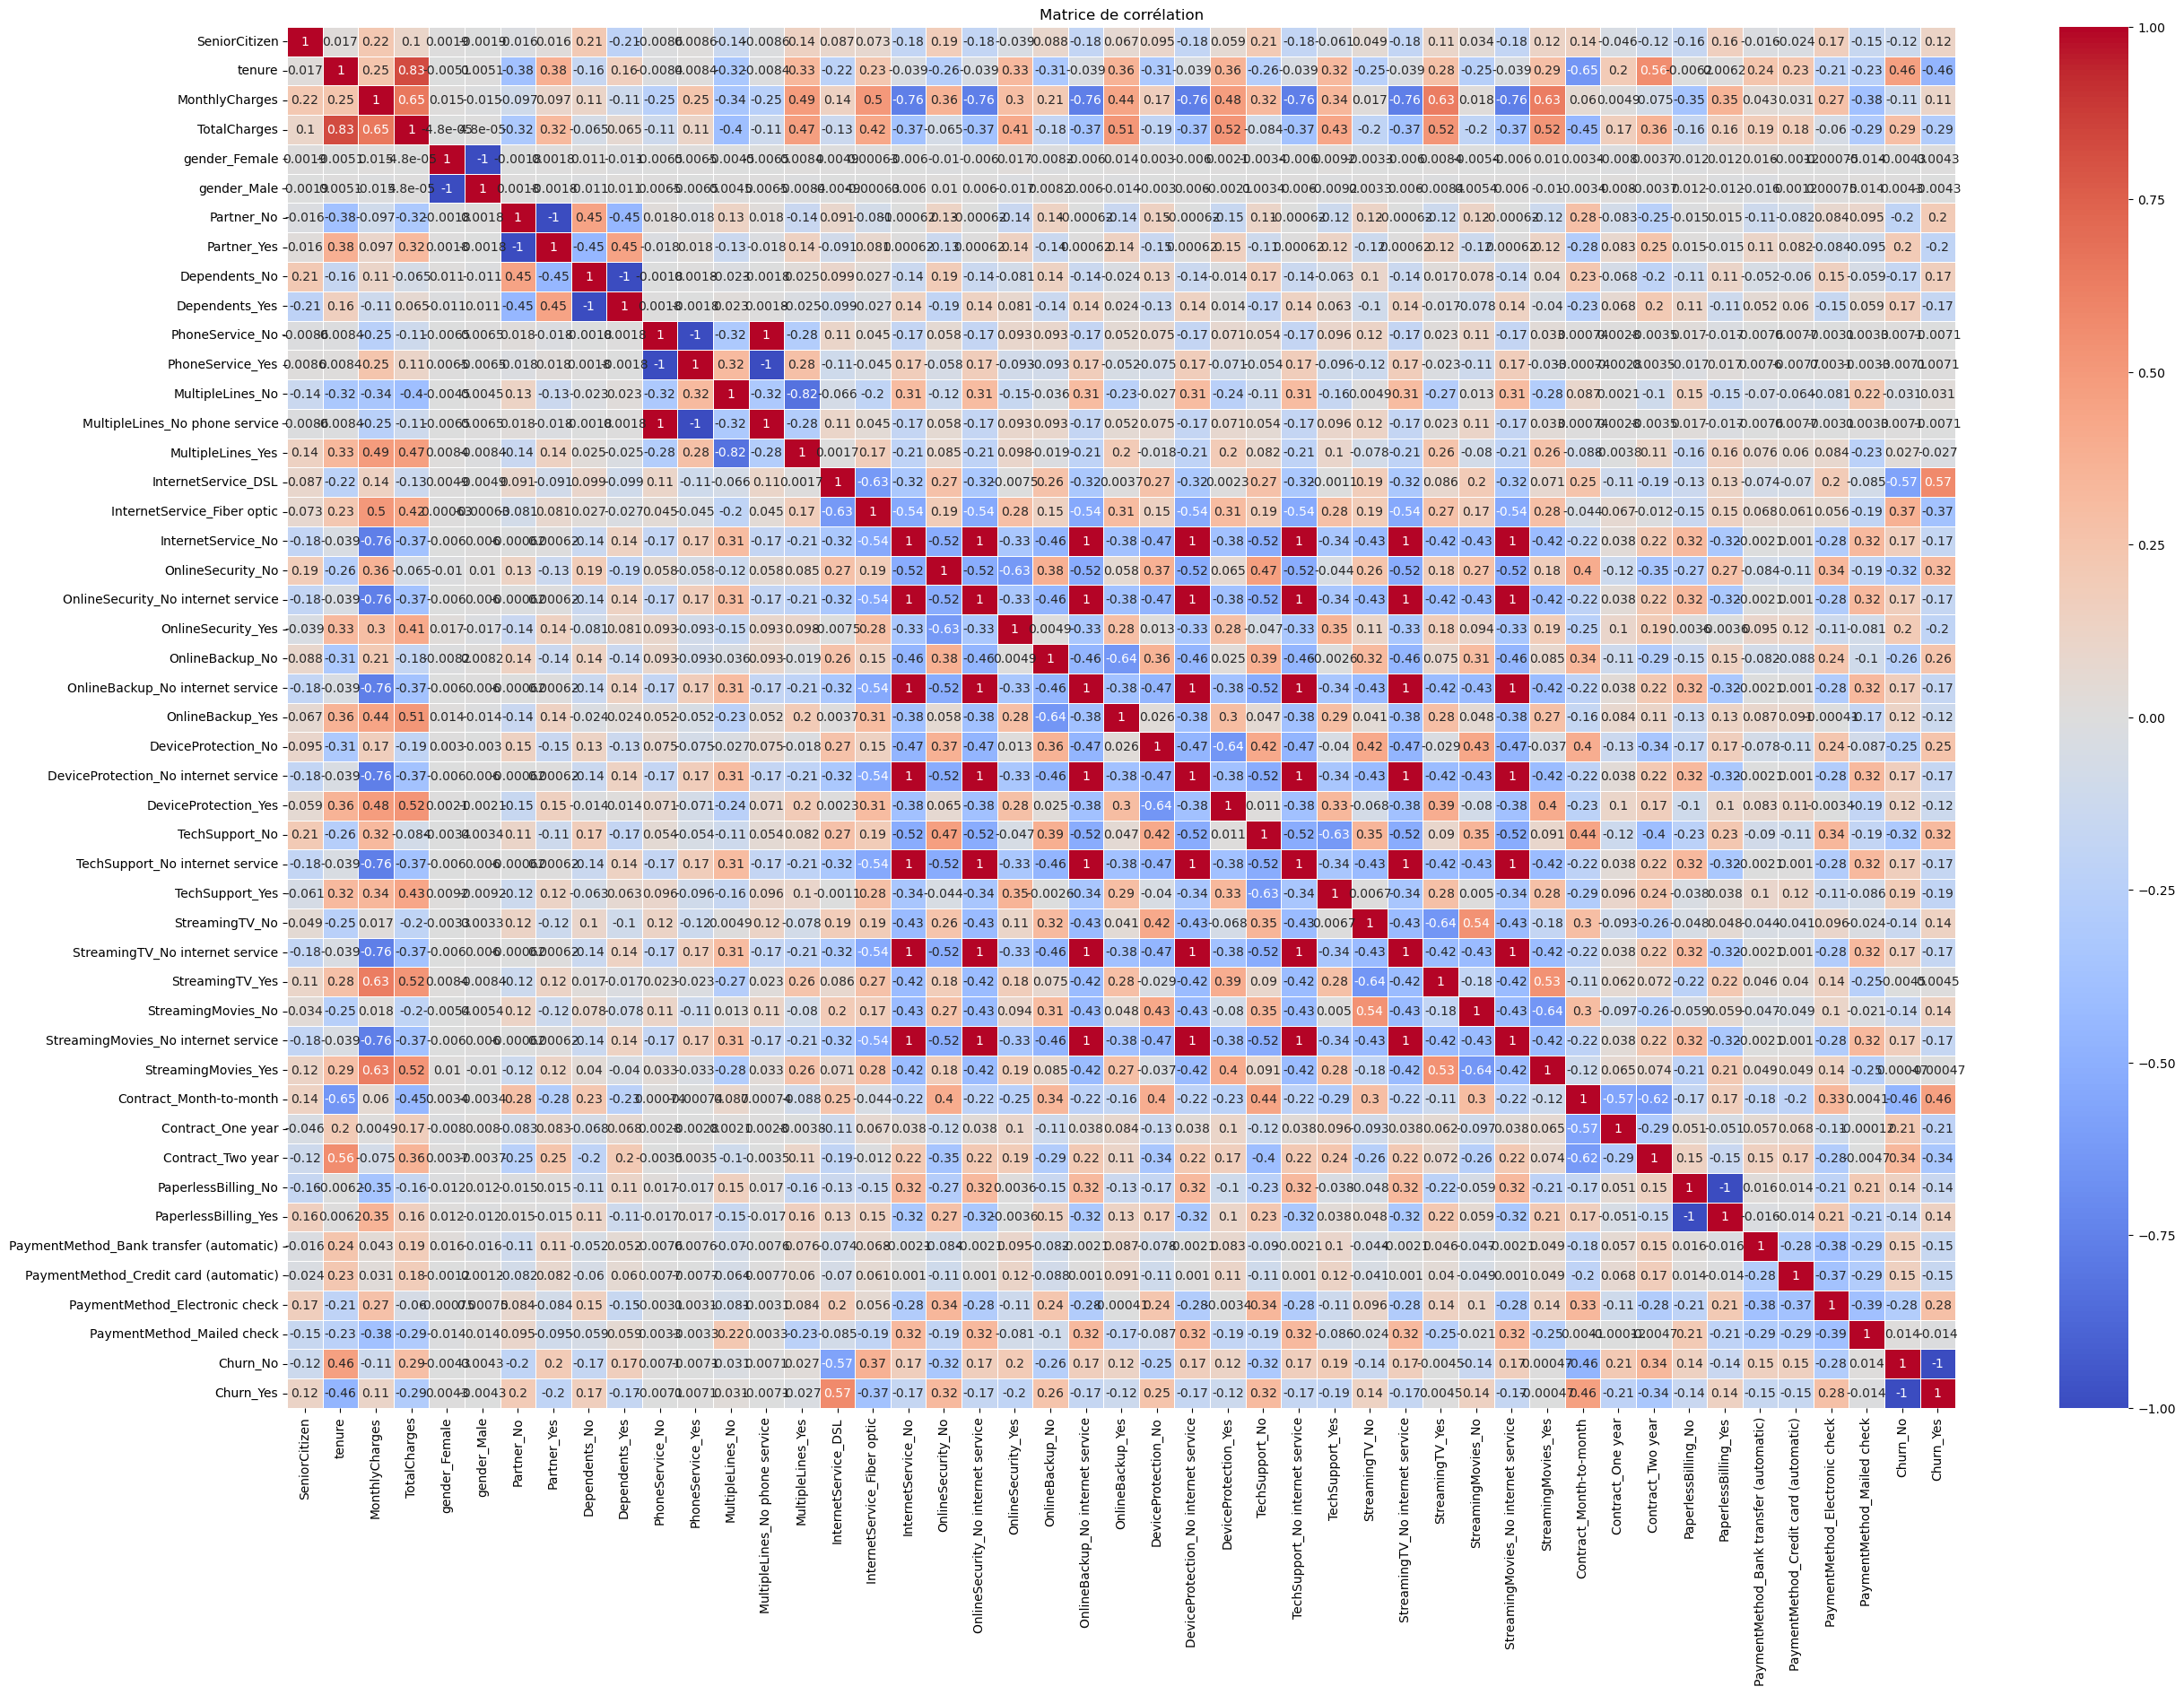

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,20))
sns.heatmap(CHURN_num.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

MACHINE LEARNING CLUSTER

In [49]:
CHURN_num = pd.get_dummies(CHURN, columns=['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'])

CHURN_num.drop(columns='customerID', inplace=True)

In [50]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = CHURN_num[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]
y = CHURN_num['Churn']

In [51]:
CHURN_num = CHURN_num.replace({'Yes' : 1, 'No' : 0})
CHURN_num = CHURN_num.replace(" ", np.nan)  # Remplace les espaces vides par NaN
CHURN_num = CHURN_num.astype(float)  # Convertit en float

C:\Users\nicol\AppData\Local\Temp\ipykernel_29160\2357733536.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CHURN_num = CHURN_num.replace({'Yes' : 1, 'No' : 0})


In [52]:
print(CHURN_num.isnull().sum())

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [53]:
CHURN_num = CHURN_num.fillna(0)

In [54]:
print(CHURN_num.dtypes)

SeniorCitizen                              float64
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                      float64
gender_Female                              float64
gender_Male                                float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No                         float64
OnlineSecurity_No              

In [55]:
CHURN_num.loc[:, CHURN_num.dtypes == 'str']

""
0
1
2
3
4
...
7038
7039
7040
7041


In [56]:
CHURN_num.isna().sum().sort_values()

SeniorCitizen                              0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSupport_No internet service            0
TechSupport_Yes                            0
StreamingTV_No                             0
StreamingTV_No internet service            0
StreamingTV_Yes                            0
StreamingMovies_No                         0
StreamingMovies_No internet service        0
StreamingMovies_Yes                        0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaperlessBilling_No                        0
PaperlessBilling_Yes                       0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
OnlineBackup_Yes                           0
OnlineBackup_No internet service           0
OnlineBack

In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Assuming CHURN_num is your DataFrame
# Step 1: Identify columns with non-numeric data
non_numeric_columns = CHURN_num.select_dtypes(include=['object']).columns

# Step 2: Clean the data
# Option 1: Drop rows with non-numeric values
CHURN_num_cleaned = CHURN_num.dropna(subset=non_numeric_columns)

# Option 2: Fill non-numeric values with a suitable numeric value
# For example, filling with the mean of the column
for col in non_numeric_columns:
    CHURN_num[col] = pd.to_numeric(CHURN_num[col], errors='coerce')
    CHURN_num[col].fillna(CHURN_num[col].mean(), inplace=True)

# Step 3: Convert data types
CHURN_num_cleaned = CHURN_num.apply(pd.to_numeric, errors='coerce')

# Now you can fit the KMeans model
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(CHURN_num_cleaned)
labels3 = kmeans3.labels_
centers3 = kmeans3.cluster_centers_

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
CHURN_num['Cluster'] = kmeans.fit_predict(X_pca)

c:\Users\nicol\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nicol\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\nicol\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nicol\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\nicol\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(e

ValueError: could not convert string to float: ' '

In [ ]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = CHURN_num['Cluster']
pca_df['Churn'] = CHURN_num['Churn']

NameError: name 'X_pca' is not defined

NameError: name 'pca_df' is not defined

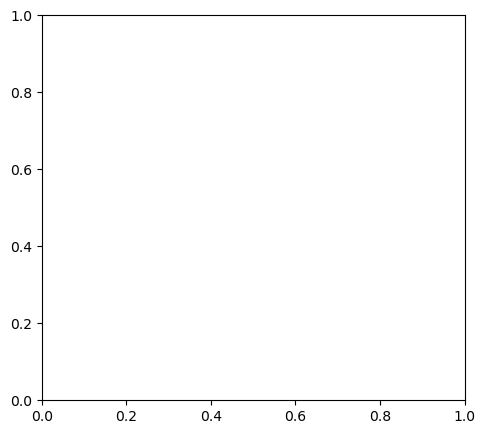

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='viridis', alpha=0.7)
plt.title("Clusters K-Means (avec PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")

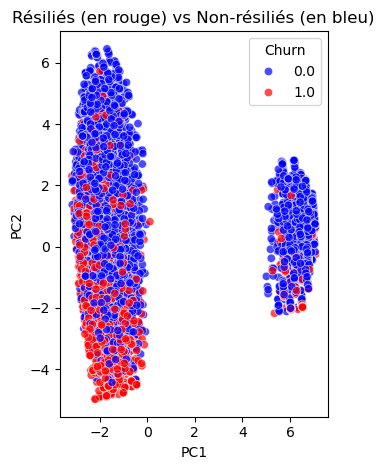

In [ ]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Churn'], palette={0: "blue", 1: "red"}, alpha=0.7)
plt.title("Résiliés (en rouge) vs Non-résiliés (en bleu)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Churn")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Best Random Forest Model:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Random Forest Model: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy: 0.8779276082327893
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       959
         1.0       0.81      0.81      0.81       450

    accuracy                           0.88      1409
   macro avg       0.86      0.86      0.86      1409
weighted avg       0.88      0.88      0.88      1409



In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Évaluation
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8914123491838183
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       959
         1.0       0.84      0.82      0.83       450

    accuracy                           0.89      1409
   macro avg       0.88      0.87      0.87      1409
weighted avg       0.89      0.89      0.89      1409



In [ ]:
train_score = accuracy_score(y_train, best_rf.predict(X_train))
test_score = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")


Train Accuracy: 0.9357
Test Accuracy: 0.8779


In [ ]:
# Obtenir les probabilités de churn
probs = best_rf.predict_proba(X_test)[:, 1]  # Proba de churn (classe 1)

# Créer un DataFrame des prédictions
risk_df = pd.DataFrame({
    'Churn_Prob': probs,
    'Actual_Churn': y_test.values
}, index=pd.RangeIndex(len(probs))) 

# Filtrer uniquement les clients non-résiliés
risk_df_non_resilies = risk_df[risk_df['Actual_Churn'] == 0]

# Trier par probabilité décroissante
top_risk_clients = risk_df_non_resilies.sort_values(by='Churn_Prob', ascending=False)

# Afficher les 10 clients les plus à risque
print(top_risk_clients.head(10))

      Churn_Prob  Actual_Churn
622     0.968230           0.0
962     0.930798           0.0
456     0.882441           0.0
786     0.855137           0.0
1060    0.848151           0.0
706     0.842250           0.0
460     0.812196           0.0
490     0.803900           0.0
1061    0.802158           0.0
481     0.783217           0.0


In [ ]:
# Obtenir les probabilités de churn
probs = best_rf.predict_proba(X_test)[:, 1]  # Proba de churn (classe 1)

# Créer un DataFrame des prédictions
risk_df = pd.DataFrame({
    'Churn_Prob': probs,
    'Actual_Churn': y_test.values
}, index=pd.RangeIndex(len(probs))) 

# Filtrer uniquement les clients non-résiliés
# risk_df_non_resilies = risk_df[risk_df['Actual_Churn'] == 0]

# Trier par probabilité décroissante
top_risk_clients = risk_df.sort_values(by='Churn_Prob', ascending=False)

# Afficher les 10 clients les plus à risque
print(top_risk_clients.head(10))

C:\Users\nicol\AppData\Local\Temp\ipykernel_18668\1438803476.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10], palette="viridis")


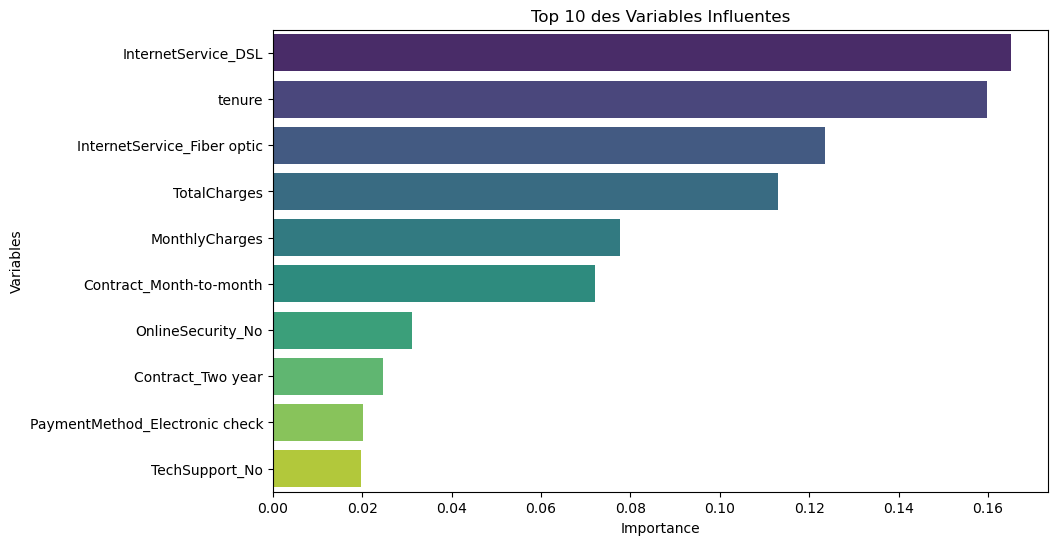

In [ ]:
importances = best_rf.feature_importances_  # Si on utilise RandomForest
feature_names = X.columns  # Récupérer les noms des colonnes

# Créer un DataFrame pour visualiser l'importance des variables
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 📊 Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title("Top 10 des Variables Influentes")
plt.show()
